In [92]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ujwal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('Reviews.csv')
df = df.head(20000)

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Data Cleaning:

In [4]:
df.shape

(20000, 10)

In [5]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
df.drop(columns = ['ProductId', 'Id', 'Time'], inplace = True)

In [7]:
df.isnull().sum()

UserId                    0
ProfileName               1
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Summary                   0
Text                      0
dtype: int64

In [8]:
df.dtypes

UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Summary                   object
Text                      object
dtype: object

In [9]:
# Converting the text column into lower values
df['Text'] = df['Text'].str.lower()

In [10]:
# It removes digits, punctuation, special characters, or anything other than English letters and spaces.
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [11]:
df.head()

,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,i have bought several of the vitality canned d...
1,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,product arrived labeled as jumbo salted peanut...
2,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",this is a confection that has been around a fe...
3,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,if you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,great taffy at a great price there was a wide...


In [12]:
# Visualization 
vis = df['Score'].value_counts()

In [13]:
vis

Score
5    12571
4     2836
1     1824
3     1649
2     1120
Name: count, dtype: int64

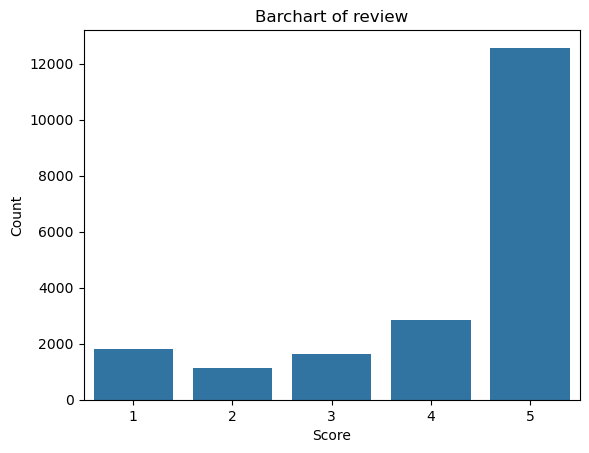

In [107]:
sns.barplot(vis)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Barchart of review')
plt.show()

In [15]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ujwal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
# This line of code applies the word_tokenize function to each review text in the 'Text' column of the DataFrame df. 
# It transforms each review text (a string) into a list of individual words (tokens).
df['Text'] = df['Text'].apply(word_tokenize)

In [17]:
df['Text']

0        [i, have, bought, several, of, the, vitality, ...
1        [product, arrived, labeled, as, jumbo, salted,...
2        [this, is, a, confection, that, has, been, aro...
3        [if, you, are, looking, for, the, secret, ingr...
4        [great, taffy, at, a, great, price, there, was...
                               ...                        
19995    [deep, river, salt, vinegar, chips, are, thick...
19996    [i, was, very, skeptical, about, buying, a, br...
19997    [before, you, turn, to, other, name, brands, o...
19998    [i, was, expecting, some, serious, flavor, as,...
19999    [i, purchased, the, salt, and, vinegar, chips,...
Name: Text, Length: 20000, dtype: object

In [18]:
# This line removes common stopwords (like "the", "is", "and", etc.)
# from the tokenized text in the 'Text' column by filtering out any word that appears in the predefined list of English stopwords.
stop_words = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: [word for word in x if word not in stop_words])


In [19]:
df['Text']

0        [bought, several, vitality, canned, dog, food,...
1        [product, arrived, labeled, jumbo, salted, pea...
2        [confection, around, centuries, light, pillowy...
3        [looking, secret, ingredient, robitussin, beli...
4        [great, taffy, great, price, wide, assortment,...
                               ...                        
19995    [deep, river, salt, vinegar, chips, thick, cru...
19996    [skeptical, buying, brand, chips, never, taste...
19997    [turn, name, brands, give, try, although, maui...
19998    [expecting, serious, flavor, advertised, bag, ...
19999    [purchased, salt, vinegar, chips, pleased, rig...
Name: Text, Length: 20000, dtype: object

In [20]:
# This line converts the tokenized list of words back into a single string (sentence) by joining the words with spaces, 
#but only if the text is a list; otherwise, 
#it keeps the text as is.
df['Text'] = df['Text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))


In [21]:
df['Text']

0        bought several vitality canned dog food produc...
1        product arrived labeled jumbo salted peanutsth...
2        confection around centuries light pillowy citr...
3        looking secret ingredient robitussin believe f...
4        great taffy great price wide assortment yummy ...
                               ...                        
19995    deep river salt vinegar chips thick crunchy ta...
19996    skeptical buying brand chips never tasted much...
19997    turn name brands give try although maui onion ...
19998    expecting serious flavor advertised bag compar...
19999    purchased salt vinegar chips pleased right amo...
Name: Text, Length: 20000, dtype: object

In [22]:
df.head()

,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,bought several vitality canned dog food produc...
1,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,product arrived labeled jumbo salted peanutsth...
2,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",confection around centuries light pillowy citr...
3,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,looking secret ingredient robitussin believe f...
4,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,great taffy great price wide assortment yummy ...


## Classify reviews as positive, negative, or neutral based on the sentiment of the customer comments.

In [23]:
# This line creates a new 'Sentiment' column by categorizing the 'Score' column into three sentiment labels: 
# 'positive' for scores greater than 3, 
#'neutral' for scores equal to 3, and 'negative' for scores less than 3.
df['Sentiment'] = df['Score'].apply(lambda x: 'positive' if x > 3 else ('neutral' if x == 3 else 'negative'))

In [24]:
df.head()

,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Sentiment
0,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,bought several vitality canned dog food produc...,positive
1,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,product arrived labeled jumbo salted peanutsth...,negative
2,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",confection around centuries light pillowy citr...,positive
3,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,looking secret ingredient robitussin believe f...,negative
4,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,great taffy great price wide assortment yummy ...,positive


# Label Encoding the categorical data

In [25]:
le = LabelEncoder()

In [26]:
df['Sentiment'] = le.fit_transform(df['Sentiment'])

In [27]:
x = df['Text']
y = df['Sentiment']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)

In [29]:
x_train

4126     plugged direct windows controlled via ustreamt...
13120    cold brew coffee tradition new orleans always ...
14281    always found green tea bitter tea actually tas...
13157    usually use fresh ground beans expectations lo...
3261     drinking swiss miss watered hot chocolates tas...
                               ...                        
16547           case u kidding buy east west web site case
16317    great product love keurig green mountain break...
12895    tea delicioushas natural sweetness caffeine bi...
6012     take every day used take fish oil made change ...
6558     four year old chinese crested mix loves dog tr...
Name: Text, Length: 14000, dtype: object

In [30]:
cv = CountVectorizer()

In [31]:
cv.fit(x_train)

CountVectorizer()

In [32]:
headers = cv.get_feature_names_out()

In [33]:
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

In [34]:
x_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 471400 stored elements and shape (14000, 29225)>

In [35]:
x_train = pd.DataFrame(x_train.toarray(), columns = headers)
x_test = pd.DataFrame(x_test.toarray(), columns = headers)

In [36]:
x_train

,aa,aaaa,aadmit,aafco,aakg,aback,abandoned,abberline,abbott,abby,...,zucchini,zucchinibr,zuccini,zuke,zukebr,zukes,zukess,zupas,zuppa,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
nb = MultinomialNB()

In [38]:
nb.fit(x_train, y_train)

MultinomialNB()

In [39]:
y_pred = nb.predict(x_test)

In [40]:
y_pred

array([2, 2, 2, ..., 2, 0, 0])

In [84]:
lr = LogisticRegression()

In [86]:
lr.fit(x_train, y_train)

LogisticRegression()

In [88]:
y_pred = lr.predict(x_test)

In [90]:
y_pred

array([2, 2, 2, ..., 2, 0, 0])

# Model Evaluation:

In [94]:
accuracy_score(y_test, y_pred)

0.8413333333333334

In [100]:
precision_score(y_test, y_pred, average = 'weighted')

0.8236020779909683

In [102]:
recall_score(y_test, y_pred, average='weighted')

0.8413333333333334

In [104]:
f1_score(y_test, y_pred, average='weighted')

0.8300909052809881

In [121]:
df1 = pd.read_csv('Reviews.csv')
df1 = df1.head(20000)

In [123]:
df1

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
19995,19996,B002C50X1M,A1XRXZI5KOMVDD,"KAF1958 ""amandaf0626""",0,0,4,1307664000,Crispy and tart,Deep River Salt & Vinegar chips are thick and ...
19996,19997,B002C50X1M,A7G9M0IE7LABX,Kevin,0,0,5,1307059200,Exceeded my expectations. One of the best chip...,I was very skeptical about buying a brand of c...
19997,19998,B002C50X1M,A38J5PRUDESMZF,ray,0,0,5,1305763200,"Awesome Goodness! (deep river kettle chips, sw...",Before you turn to other name brands out there...
19998,19999,B002C50X1M,A17TPOSAG43GSM,Herrick,0,0,3,1303171200,"Pretty good, but prefer other jalapeno chips","I was expecting some ""serious flavor"" as it wa..."


In [131]:
df1.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [133]:
df1.drop(columns = ['Id', 'ProductId', 'UserId'], inplace = True)

In [135]:
df1.head()

,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [137]:
df1['Text'] = df1['Text'].str.lower()

In [141]:
df1['Text'] = df1['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [143]:
df1['Text'] = df1['Text'].apply(word_tokenize)

In [145]:
stop_words = set(stopwords.words('english'))
df1['Text'] = df1['Text'].apply(lambda x: [word for word in x if word not in stop_words])

In [147]:
df1['Text'] = df1['Text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

In [149]:
df1['Sentiment'] = df1['Score'].apply(lambda x: 'positive' if x > 3 else ('neutral' if x == 3 else 'negative'))

In [151]:
df1.head()

,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,positive
1,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,negative
2,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around centuries light pillowy citr...,positive
3,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,negative
4,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...,positive


In [153]:
df1.to_csv('cleaned_reviews.csv', index=False)